In [1]:
%%html
<style type='text/css'>
.CodeMirror{
font-size: 18px;
</style>

In [3]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.models import load_model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [11]:
df = pd.read_csv('TaiwaneseBankruptcyData.csv')
df.shape

(6819, 96)

In [6]:
def clean_col_names(col_name):
    col_name = (
        col_name.strip()
        .replace("?", "_")
        .replace("(", "_")
        .replace(")", "_")
        .replace(" ", "_")
        .replace("/", "_")
        .replace("-", "_")
        .replace("__", "_")
        .replace("'", "")
        .lower()
    )
    return col_name

In [26]:
columns = list(df.columns)
columns = [clean_col_names(col_name) for col_name in columns]
df.columns = columns
display(df.columns)
df.info()

Index(['bankrupt_', 'roa_c_before_interest_and_depreciation_before_interest',
       'roa_a_before_interest_and_%_after_tax',
       'roa_b_before_interest_and_depreciation_after_tax',
       'operating_gross_margin', 'realized_sales_gross_margin',
       'operating_profit_rate', 'pre_tax_net_interest_rate',
       'after_tax_net_interest_rate',
       'non_industry_income_and_expenditure_revenue',
       'continuous_interest_rate_after_tax_', 'operating_expense_rate',
       'research_and_development_expense_rate', 'cash_flow_rate',
       'interest_bearing_debt_interest_rate', 'tax_rate_a_',
       'net_value_per_share_b_', 'net_value_per_share_a_',
       'net_value_per_share_c_', 'persistent_eps_in_the_last_four_seasons',
       'cash_flow_per_share', 'revenue_per_share_yuan_¥_',
       'operating_profit_per_share_yuan_¥_',
       'per_share_net_profit_before_tax_yuan_¥_',
       'realized_sales_gross_profit_growth_rate',
       'operating_profit_growth_rate', 'after_tax_net_profit

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   bankrupt_                                               6819 non-null   int64  
 1   roa_c_before_interest_and_depreciation_before_interest  6819 non-null   float64
 2   roa_a_before_interest_and_%_after_tax                   6819 non-null   float64
 3   roa_b_before_interest_and_depreciation_after_tax        6819 non-null   float64
 4   operating_gross_margin                                  6819 non-null   float64
 5   realized_sales_gross_margin                             6819 non-null   float64
 6   operating_profit_rate                                   6819 non-null   float64
 7   pre_tax_net_interest_rate                               6819 non-null   float64
 8   after_tax_net_interest_rate           

<AxesSubplot:xlabel='bankrupt_', ylabel='count'>

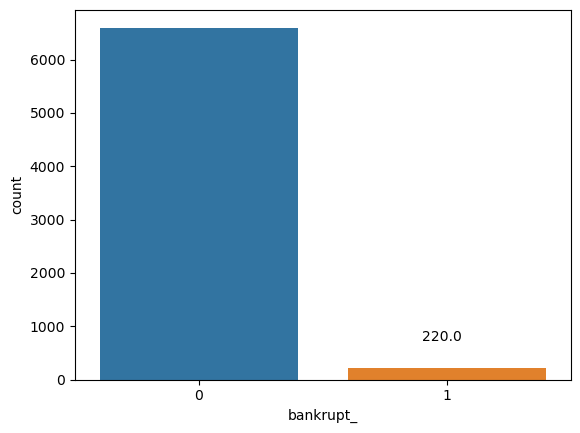

In [8]:
class_bar=sns.countplot(data=df,x="bankrupt_")
ax = plt.gca()
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+500))
class_bar

In [32]:
import scipy.stats
skew_df = pd.DataFrame(df.select_dtypes(np.number).columns, columns = ['Feature'])

skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: scipy.stats.skew(df[feature])) 

skew_df['Absolute Skew'] = skew_df['Skew'].apply(abs)  # to obtain magnitude of skew irrelevant of direction
skew_df['Skewed']= skew_df['Absolute Skew'].apply(lambda x: True if x >= 0.5 else False)
with pd.option_context("display.max_rows", 1000):
    display(skew_df)
non_skew_df = skew_df[skew_df['Skewed'] == False]
non_skew_df

C:\Users\shaun\AppData\Local\Temp\ipykernel_10820\2479173630.py:4: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: scipy.stats.skew(df[feature]))


,Feature,Skew,Absolute Skew,Skewed
0,bankrupt_,5.294223,5.294223,True
1,roa_c_before_interest_and_depreciation_before_...,-0.323870,0.323870,False
2,roa_a_before_interest_and_%_after_tax,-1.033499,1.033499,True
3,roa_b_before_interest_and_depreciation_after_tax,-0.763396,0.763396,True
4,operating_gross_margin,-8.041599,8.041599,True
5,realized_sales_gross_margin,-8.064798,8.064798,True
6,operating_profit_rate,-70.221713,70.221713,True
7,pre_tax_net_interest_rate,-52.471321,52.471321,True
8,after_tax_net_interest_rate,-52.984085,52.984085,True
9,non_industry_income_and_expenditure_revenue,39.632969,39.632969,True


,Feature,Skew,Absolute Skew,Skewed
1,roa_c_before_interest_and_depreciation_before_...,-0.323870,0.323870,False
54,working_capital_to_total_assets,-0.192269,0.192269,False
55,quick_assets_total_assets,0.337240,0.337240,False
56,current_assets_total_assets,0.075874,0.075874,False
80,cash_flow_to_total_assets,-0.228107,0.228107,False
82,cfo_to_assets,-0.443665,0.443665,False
94,net_income_flag,NaN,NaN,False


C:\Users\shaun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,bankrupt_,roa_c_before_interest_and_depreciation_before_interest,roa_a_before_interest_and_%_after_tax,roa_b_before_interest_and_depreciation_after_tax,operating_gross_margin,realized_sales_gross_margin,operating_profit_rate,pre_tax_net_interest_rate,after_tax_net_interest_rate,non_industry_income_and_expenditure_revenue,...,net_income_to_total_assets,total_assets_to_gnp_price,no_credit_interval,gross_profit_to_sales,net_income_to_stockholders_equity,liability_to_equity,degree_of_financial_leverage_dfl_,interest_coverage_ratio_interest_expense_to_ebit_,net_income_flag,equity_to_liability
5948,0,0.493053,0.550153,0.542749,0.598719,0.598726,0.998978,0.797414,0.809331,0.303548,...,0.806313,0.002373,0.623842,0.598718,0.840814,0.278825,0.026850,0.565424,1,0.033593
6412,1,0.452445,0.515754,0.508004,0.611828,0.611849,0.998919,0.797270,0.809219,0.303421,...,0.781853,0.001401,0.623704,0.611823,0.838304,0.285822,0.026318,0.561074,1,0.018921
2740,0,0.453371,0.541703,0.529632,0.616159,0.616101,0.998995,0.797124,0.809319,0.303006,...,0.796693,0.007293,0.623598,0.616160,0.840101,0.279800,0.026220,0.559231,1,0.029144
810,0,0.565641,0.615460,0.604422,0.620959,0.620959,0.999296,0.797807,0.809618,0.303570,...,0.837787,0.006796,0.623925,0.620960,0.844001,0.281709,0.026819,0.565287,1,0.024005
4964,0,0.529372,0.578827,0.572782,0.618768,0.618465,0.999119,0.797525,0.809417,0.303447,...,0.826080,0.000951,0.623939,0.618767,0.841652,0.275774,0.026793,0.565167,1,0.098849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,1,0.456101,0.520715,0.510895,0.597630,0.597818,0.998938,0.797333,0.809271,0.303491,...,0.789400,0.001480,0.623399,0.597631,0.839201,0.286551,0.026478,0.563037,1,0.018387
2365,0,0.482426,0.548517,0.530917,0.610667,0.610667,0.999155,0.797516,0.809403,0.303357,...,0.801566,0.005322,0.617838,0.610662,0.841438,0.303879,0.027384,0.566968,1,0.013547
2302,0,0.434456,0.493894,0.483484,0.589638,0.589638,0.998880,0.797258,0.809191,0.303480,...,0.769399,0.006867,0.621460,0.589633,0.836074,0.289599,0.026578,0.563887,1,0.016721
5594,0,0.613318,0.657109,0.643236,0.612311,0.612311,0.999104,0.797610,0.809475,0.303627,...,0.861487,0.000505,0.623990,0.612312,0.845062,0.279109,0.026797,0.565185,1,0.032093


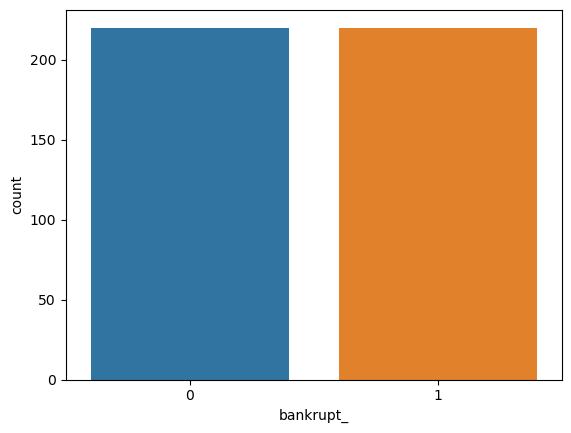

In [35]:
df2 = df.sample(frac=1) #Shuffle Bankruptcy df

df_b = df2.loc[df2["bankrupt_"] == 1]
df_nb = df2.loc[df2["bankrupt_"] == 0][:220]

subdf_comb = pd.concat([df_b,df_nb])
subdf = subdf_comb.sample(frac=1,random_state=42)
sns.countplot(subdf["bankrupt_"])
subdf

<AxesSubplot:>

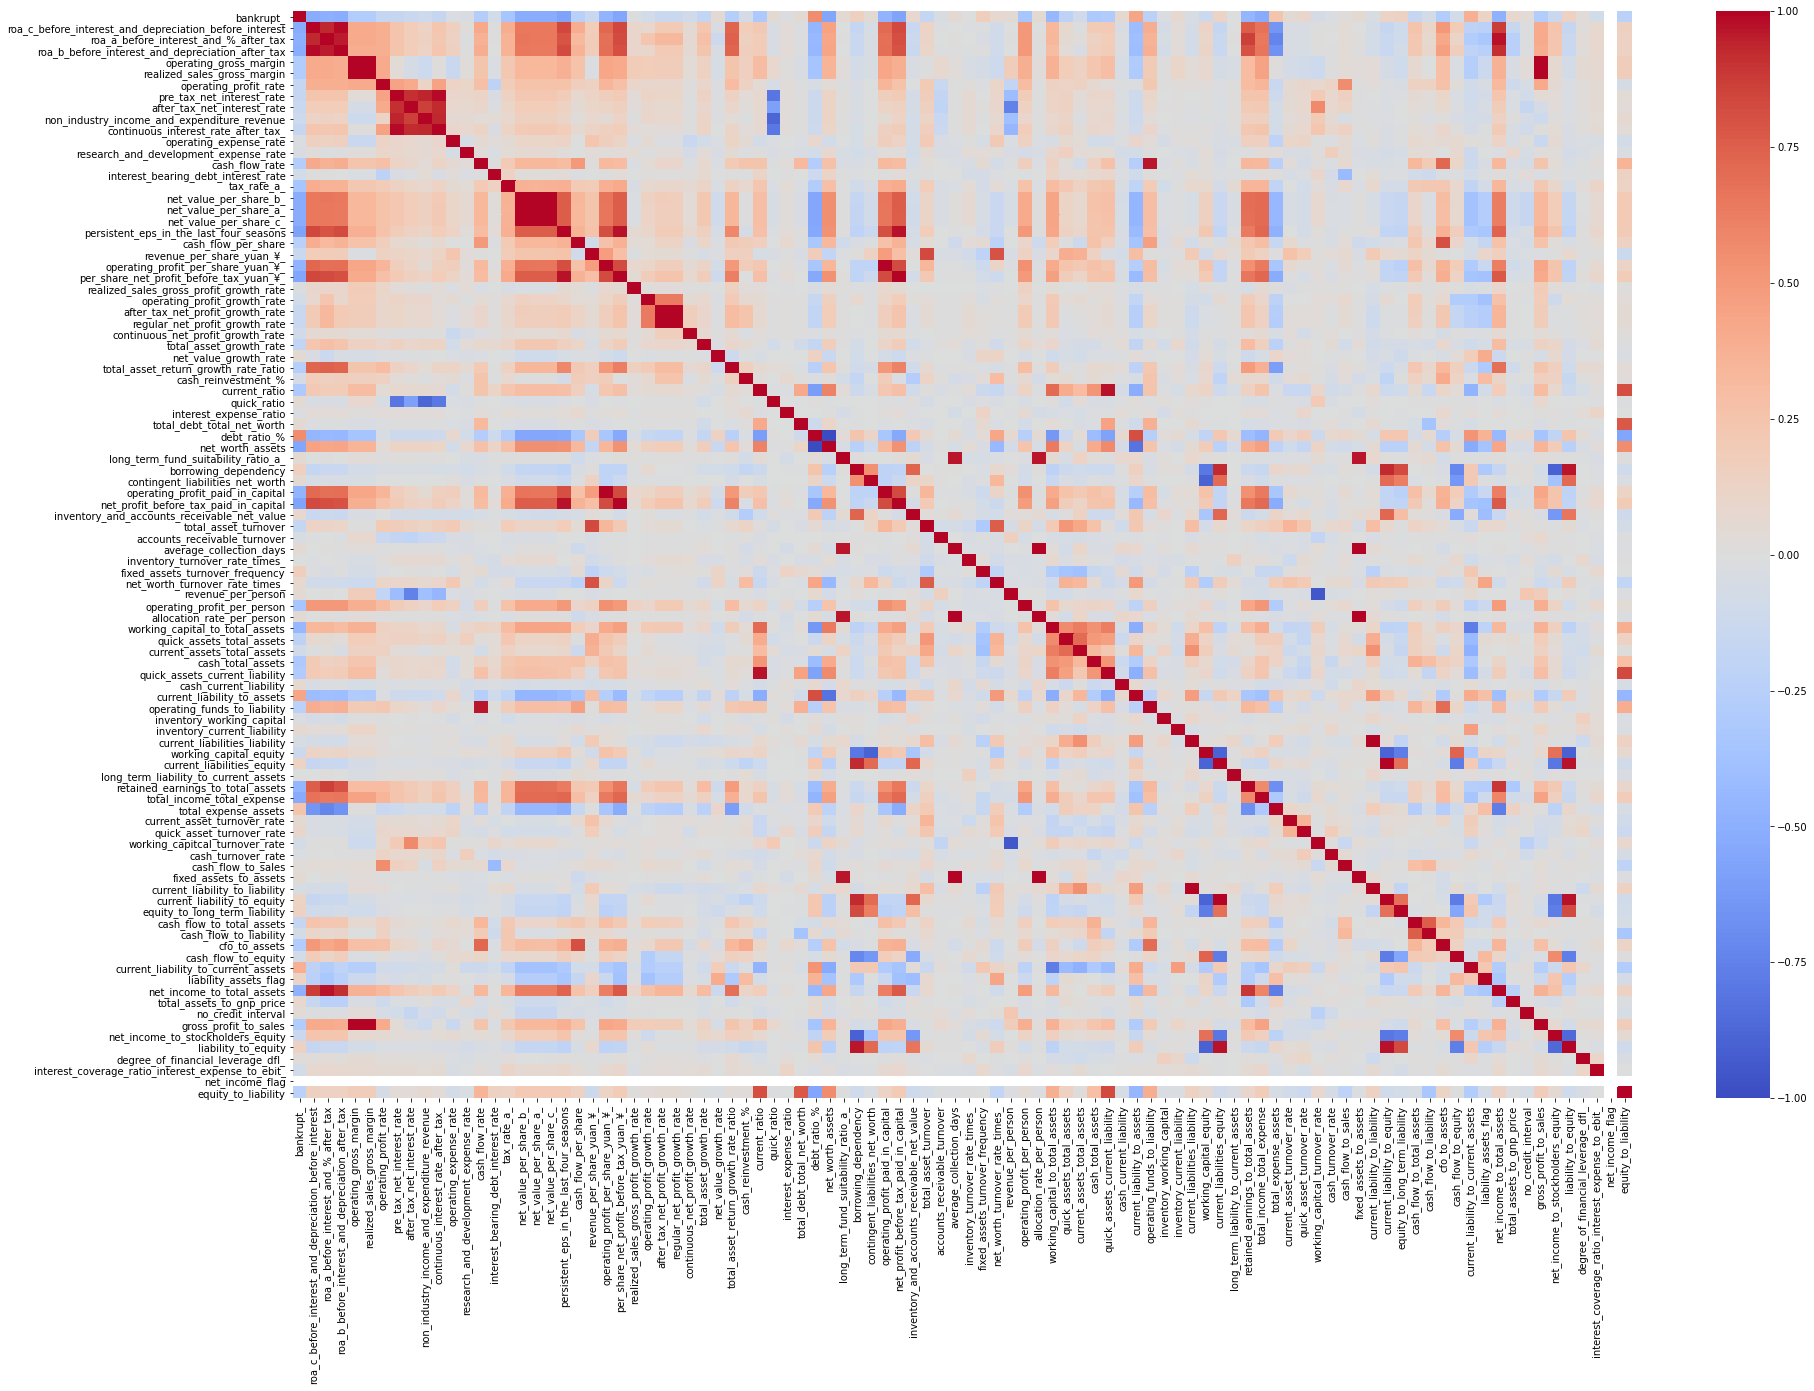

In [12]:
fig = plt.figure(figsize=(30,20))
ax1 = fig.add_subplot(1,1,1)
sns.heatmap(subdf.corr(),ax=ax1,cmap="coolwarm")

In [129]:
corr=subdf[subdf.columns[:-1]].corr()['bankrupt_'][:]

corr_df = pd.DataFrame(corr)

print("Correlations to Bankruptcy:")
for index, row in corr_df["bankrupt_"].iteritems():
    if row!=1.0 and row>=0.5:
        print(f'Positive Correlation: {index}')
    elif row!=1.0 and row<=-0.5:
        print(f'Negative Correlation: {index}')

Correlations to Bankruptcy:
Negative Correlation: roa_c_before_interest_and_depreciation_before_interest
Negative Correlation: roa_a_before_interest_and_%_after_tax
Negative Correlation: roa_b_before_interest_and_depreciation_after_tax
Negative Correlation: net_value_per_share_b_
Negative Correlation: net_value_per_share_a_
Negative Correlation: net_value_per_share_c_
Negative Correlation: persistent_eps_in_the_last_four_seasons
Negative Correlation: per_share_net_profit_before_tax_yuan_¥_
Positive Correlation: ('debt_ratio_%', 0.5823940440480757)
Negative Correlation: net_worth_assets
Negative Correlation: net_profit_before_tax_paid_in_capital
Negative Correlation: working_capital_to_total_assets
Negative Correlation: total_income_total_expense
Negative Correlation: net_income_to_total_assets


X = subdf.iloc[:5114,1:].values
Y = subdf.iloc[:5114,[0]].values
#training_df = pd.concat([X,Y])
#training_df
X.shape, Y.shape

In [162]:
X = subdf.iloc[:308,[1, 54, 55, 56, 80, 82, 37, 16, 17, 18, 19, 23, 38, 43, 69, 86]].values
Y = subdf.iloc[:308,[0]].values
#training_df = pd.concat([X,Y])
#training_df
X.shape, Y.shape

((308, 16), (308, 1))


# Training

In [163]:
model = Sequential()
model.add(Dense(16, input_shape=(16,), activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model = Sequential()
model.add(Dense(7, input_shape=(7,), activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [164]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [165]:
model.fit(X, Y, epochs=250)

Epoch 1/250
10/10 [==============================] - 1s 3ms/step - loss: 0.6987 - accuracy: 0.5032
Epoch 2/250
10/10 [==============================] - 0s 4ms/step - loss: 0.6937 - accuracy: 0.5000
Epoch 3/250
10/10 [==============================] - 0s 4ms/step - loss: 0.6915 - accuracy: 0.5584
Epoch 4/250
10/10 [==============================] - 0s 4ms/step - loss: 0.6902 - accuracy: 0.5714
Epoch 5/250
10/10 [==============================] - 0s 4ms/step - loss: 0.6899 - accuracy: 0.4968
Epoch 6/250
10/10 [==============================] - 0s 4ms/step - loss: 0.6896 - accuracy: 0.4968
Epoch 7/250
10/10 [==============================] - 0s 4ms/step - loss: 0.6890 - accuracy: 0.4968
Epoch 8/250
10/10 [==============================] - 0s 3ms/step - loss: 0.6884 - accuracy: 0.4968
Epoch 9/250
10/10 [==============================] - 0s 4ms/step - loss: 0.6876 - accuracy: 0.5000
Epoch 10/250
10/10 [==============================] - 0s 3ms/step - loss: 0.6870 - accuracy: 0.5000
Epoch 11/

10/10 [==============================] - 0s 3ms/step - loss: 0.3840 - accuracy: 0.8442
Epoch 84/250
10/10 [==============================] - 0s 4ms/step - loss: 0.3859 - accuracy: 0.8539
Epoch 85/250
10/10 [==============================] - 0s 3ms/step - loss: 0.3815 - accuracy: 0.8442
Epoch 86/250
10/10 [==============================] - 0s 4ms/step - loss: 0.3809 - accuracy: 0.8571
Epoch 87/250
10/10 [==============================] - 0s 3ms/step - loss: 0.3812 - accuracy: 0.8442
Epoch 88/250
10/10 [==============================] - 0s 4ms/step - loss: 0.3856 - accuracy: 0.8474
Epoch 89/250
10/10 [==============================] - 0s 4ms/step - loss: 0.3754 - accuracy: 0.8506
Epoch 90/250
10/10 [==============================] - 0s 3ms/step - loss: 0.3794 - accuracy: 0.8539
Epoch 91/250
10/10 [==============================] - 0s 4ms/step - loss: 0.3781 - accuracy: 0.8506
Epoch 92/250
10/10 [==============================] - 0s 3ms/step - loss: 0.3750 - accuracy: 0.8474
Epoch 93/250


10/10 [==============================] - 0s 3ms/step - loss: 0.3336 - accuracy: 0.8604
Epoch 246/250
10/10 [==============================] - 0s 4ms/step - loss: 0.3320 - accuracy: 0.8604
Epoch 247/250
10/10 [==============================] - 0s 3ms/step - loss: 0.3320 - accuracy: 0.8669
Epoch 248/250
10/10 [==============================] - 0s 4ms/step - loss: 0.3334 - accuracy: 0.8669
Epoch 249/250
10/10 [==============================] - 0s 4ms/step - loss: 0.3324 - accuracy: 0.8604
Epoch 250/250
10/10 [==============================] - 0s 3ms/step - loss: 0.3315 - accuracy: 0.8636


In [50]:
model_json = model.to_json()

# Testing

X_test = df.iloc[5114:,1:].values
Y_test = df.iloc[5114:,[0]]
predictions = model.predict(X_test)
print(predictions.shape)

In [167]:
X_test = subdf.iloc[308:,[1, 54, 55, 56, 80, 82, 37,16, 17, 18, 19, 23, 38, 43, 69, 86]].values
Y_test = subdf.iloc[308:,[0]]
predictions = model.predict(X_test)
print(predictions.shape)

5/5 [==============================] - 0s 5ms/step
(132, 1)


In [168]:
bankrupt = subdf['bankrupt_'].to_list()
#df.info()

In [169]:
pred_list = []
for i in range(predictions.size):
    pred_list.append(predictions[i][0])
#df['Predictions'] = pred_list
pred_frame = {'bankrupt?': bankrupt[308:],
         'Predictions': pred_list
        }
pred_df = pd.DataFrame(pred_frame)

In [170]:
pred_df['binary_prediction'] = pred_df['Predictions'].apply(lambda x: 0 if x<0.5 else 1)
pred_df["NN_Correct?"] = pred_df.apply(lambda x: x['bankrupt?'] if x['binary_prediction'] == x['bankrupt?'] else np.nan, axis=1)
pred_df.to_csv('BankruptcyPrediction.csv')
pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bankrupt?          132 non-null    int64  
 1   Predictions        132 non-null    float32
 2   binary_prediction  132 non-null    int64  
 3   NN_Correct?        109 non-null    float64
dtypes: float32(1), float64(1), int64(2)
memory usage: 3.7 KB


In [111]:
Y_Test = pred_df.iloc[:,[0]]
Y_Pred = pred_df.iloc[:,[2]]

In [112]:
cm = confusion_matrix(Y_Test, Y_Pred)
cm

array([[53, 14],
       [ 8, 57]], dtype=int64)

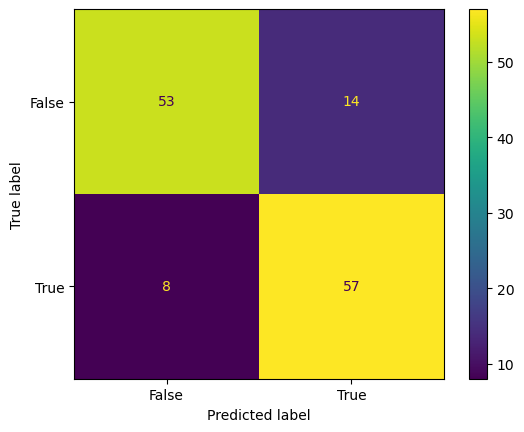

In [113]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()

In [97]:
X = subdf.iloc[:,[1, 54, 55, 56, 80, 82, 37]].values
print(X)
Y = subdf.iloc[:, 0].values

[[0.50509433 0.75226617 0.14321406 ... 0.63483306 0.63782229 0.14015781]
 [0.46979964 0.80359113 0.26554937 ... 0.64017506 0.50341434 0.19218793]
 [0.48978696 0.76775435 0.22273711 ... 0.6463896  0.57490321 0.1097137 ]
 ...
 [0.49661191 0.74304519 0.19569976 ... 0.64852333 0.57993872 0.15599964]
 [0.49939063 0.77249561 0.15661986 ... 0.64558465 0.56651821 0.10780905]
 [0.45463852 0.83346571 0.44487667 ... 0.65371704 0.54807593 0.19415304]]


In [98]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.30, random_state = 0)
X_Train.shape
Y_Train.shape

(308,)

In [99]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

In [100]:
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_Train, Y_Train)

SVC(kernel='linear', random_state=0)

In [2]:
SVC.score(X_Test, Y_Test)

NameError: name 'SVC' is not defined

In [101]:
Y_Pred = classifier.predict(X_Test)
cm = confusion_matrix(Y_Test, Y_Pred)
cm

array([[52, 15],
       [ 8, 57]], dtype=int64)

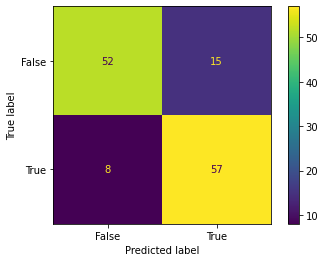

In [102]:
from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()

In [103]:
pred_df['SVM_Prediction'] = list(Y_Pred)
pred_df

,bankrupt?,Predictions,binary_prediction,NN_Correct?,SVM_Prediction
0,0,0.076294,0,0.0,0
1,1,0.857619,1,1.0,0
2,0,0.136518,0,0.0,1
3,0,0.056519,0,0.0,1
4,1,0.884807,1,1.0,1
...,...,...,...,...,...
127,1,0.723606,1,1.0,0
128,0,0.035743,0,0.0,1
129,0,0.436114,0,0.0,1
130,0,0.227449,0,0.0,1


In [105]:
pred_df["SVM_Correct?"] = pred_df.apply(lambda x: x['bankrupt?'] if x['SVM_Prediction'] == x['bankrupt?'] else np.nan, axis=1)
pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bankrupt?          132 non-null    int64  
 1   Predictions        132 non-null    float64
 2   binary_prediction  132 non-null    int64  
 3   NN_Correct?        116 non-null    float64
 4   SVM_Prediction     132 non-null    int64  
 5   SVM_Correct?       65 non-null     float64
dtypes: float64(3), int64(3)
memory usage: 6.3 KB
